<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
# TASK 1: Become familiar with the dataset

# The following describes the dataset variables:

# ·      CRIM - per capita crime rate by town

# ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

# ·      INDUS - proportion of non-retail business acres per town.

# ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# ·      NOX - nitric oxides concentration (parts per 10 million)

# ·      RM - average number of rooms per dwelling

# ·      AGE - proportion of owner-occupied units built prior to 1940

# ·      DIS - weighted distances to five Boston employment centres

# ·      RAD - index of accessibility to radial highways

# ·      TAX - full-value property-tax rate per $10,000

# ·      PTRATIO - pupil-teacher ratio by town

# ·      LSTAT - % lower status of the population

# ·      MEDV - Median value of owner-occupied homes in $1000's


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
#Describe the information of the Dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [11]:
#Print the shape of the dataset
boston_df.shape

(506, 14)

In [9]:
# Task 2: Generate Descriptive Statistics and Visualizations

# For all visualizations, please include a title in each graph and appropriate labels

# Generate the following and explain your findings:

# 1. For the "Median value of owner-occupied homes" provide a boxplot

# 2. Provide a  bar plot for the Charles river variable

# 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

# 5. Create a histogram for the pupil to teacher ratio variable



In [12]:
#For the Summary Statistics of the Dataset
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0, 0.5, "Distribution of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

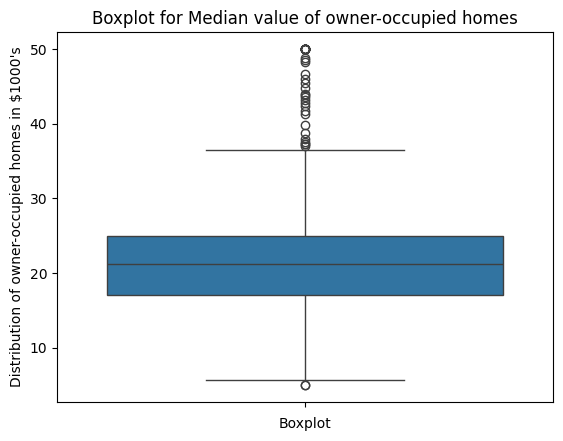

In [14]:
# 1. For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set(ylabel = "Distribution of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

In [16]:
# Calulation of the median 
boston_df['MEDV'].median()

21.2

In [38]:
counts_CHAS = pd.DataFrame(boston_df[['CHAS']].value_counts())
counts_CHAS = counts_CHAS.reset_index()
counts_CHAS

,CHAS,count
0,0.0,471
1,1.0,35


[Text(0.5, 0, 'Charles River binary variable'),
 Text(0.5, 1.0, 'Barplot for Charles River variable')]

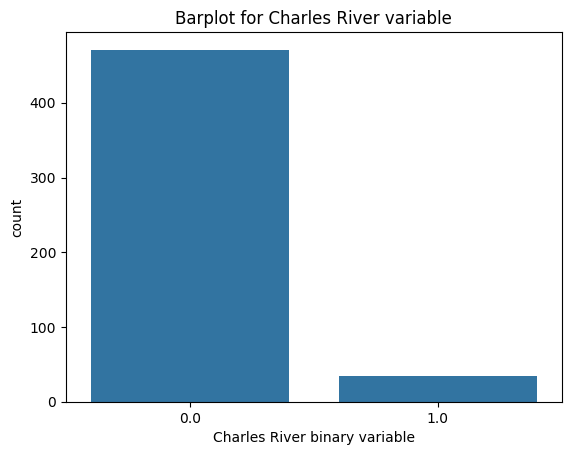

In [39]:
# 2. Provide a  bar plot for the Charles river variable
charles_barplot = sns.barplot(x='CHAS', y='count', data=counts_CHAS)
charles_barplot.set(xlabel = 'Charles River binary variable'
                     , title = 'Barplot for Charles River variable')

[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5, 1.0, 'Boxplot for MEDV variable vs AGE variable')]

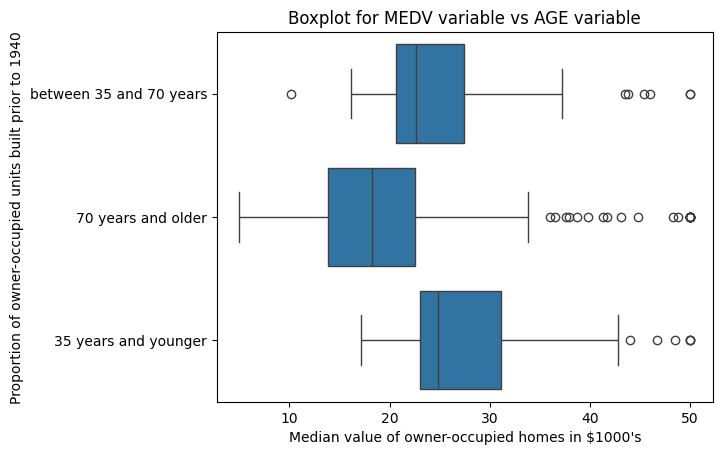

In [40]:
# 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '70 years and older'

boxplot = sns.boxplot(x='MEDV', y='Age_group', data = boston_df)
boxplot.set(xlabel = "Median value of owner-occupied homes in $1000's",
            ylabel = 'Proportion of owner-occupied units built prior to 1940',
           title = 'Boxplot for MEDV variable vs AGE variable')

[Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

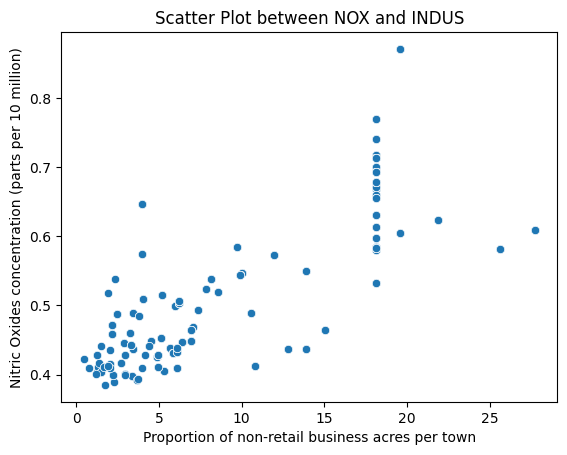

In [41]:
#4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scatplot = sns.scatterplot(x='INDUS', y='NOX', data = boston_df)
scatplot.set(xlabel='Proportion of non-retail business acres per town',
             ylabel='Nitric Oxides concentration (parts per 10 million)',
            title= 'Scatter Plot between NOX and INDUS')

In [42]:
# it seems to be a positive relationship

<ipython-input-43-6e29f9a7d15a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histplot = sns.distplot(boston_df['PTRATIO'])


[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

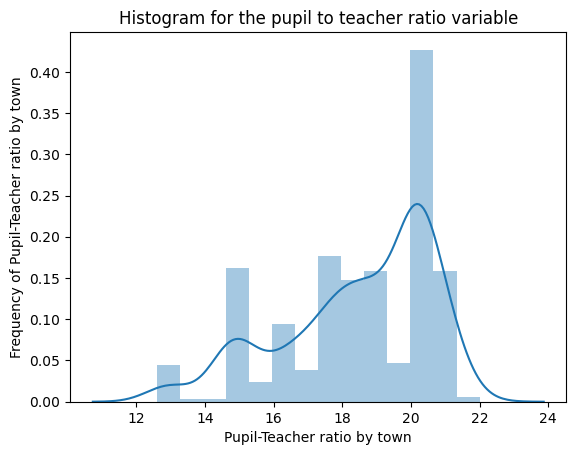

In [43]:
#5. Create a histogram for the pupil to teacher ratio variable
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

In [44]:
# TASK 3
# For each of the following questions;

# Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Q4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [45]:
# Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# For the independent t-test, the following assumptions must be met:

# *One independent, categorical variable with two levels or group
# *One dependent continuous variable
# *Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
# *The dependent variable must follow a normal distribution
# *Assumption of homogeneity of variance

# State the hypothesis

# H0:µ1=µ2 ("there is no difference in median value of houses bounded by the Charles river")
# H1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")

In [46]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [47]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

In [48]:
# CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

In [49]:
# Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Grouping the data into categories for one-way ANOVA

# 35 years and younger
# Between 35 and 70 years
# 70 years and older

In [50]:
# State the hypothesis

# H0:µ1=µ2=µ3 (the three population means are equal)
# H1: At least one of the means differ

In [52]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

In [54]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [55]:
# Separating the three samples
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [56]:
#One-way ANOVA
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

In [57]:
# CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [58]:
# Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# State the hypothesis:

# H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
# H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [59]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [60]:
# CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [61]:
# Q4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# We will state the null hypothesis:

# H0:β1 = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
# H1:β1 is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [62]:
# Input Variable
X = boston_df['DIS']

# Target Variable
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Test Statistics 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        17:03:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres.